Name: Larissa Huang (Brainstation Data Science Diploma Candidate) <br>
Contact: lari.huang@gmail.com

## Table of Contents
- [Data Preprocessing](#Data-Preprocessing)
- [Exploratory Data Analysis](#EDA)
- [Introduction](#Introduction)
- [Data Dictionary](#Data-Dictionary)


In [1]:
# import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import plotly.express as px
from IPython.display import Image, display

# be sure to import opencv-python locally 

In [2]:
import os
# Print the current working directory
print(os.getcwd())

/Users/larissahuang/Desktop/data


In [3]:
# change new_directory to your directory
new_directory = '/Users/larissahuang/Desktop'
os.chdir(new_directory)

## Data Preprocessing

In [4]:


#---
# use open cv to load a jpg into python which converts it to numpy array with pixel values, to do histogram
# (show on slide) 

# take 1 bird from type 1, what is the range of pixel values for this one bird 
#(one histogram for one picture of bird)
# use images from train folder

# can do histogram of pixel values to show difference



df = pd.read_csv('birds.csv')
df.head()

,class id,filepaths,labels,data set,scientific name
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI


We can see that the dataframe has 4 features of significance: the filepath to the image, the labels which represents the species, the dataset it belongs to, and the scientific name of the species. The class id column contains no relevant information so I will drop it. I will also rename "labels" to "species" because it's more descriptive, and drop the scientific name as the species enough. I will also rename "filepaths" to "path". 

In [5]:
df.drop('class id', axis=1, inplace=True)

df.rename(columns={'labels': 'species'}, inplace=True)

df.drop('scientific name', axis=1, inplace=True)

df.rename(columns={'filepaths': 'path'}, inplace=True)

I'll only be working with the train data set for now, so I will copy only the training images into a new df

In [6]:
df_train = df[(df["data set"] == "train")]
               

In [7]:
df_train

,path,species,data set
0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train
1,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train
2,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train
3,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train
4,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train
...,...,...,...
84630,train/BLACK BREASTED PUFFBIRD/151.jpg,BLACK BREASTED PUFFBIRD,train
84631,train/BLACK BREASTED PUFFBIRD/152.jpg,BLACK BREASTED PUFFBIRD,train
84632,train/BLACK BREASTED PUFFBIRD/153.jpg,BLACK BREASTED PUFFBIRD,train
84633,train/BLACK BREASTED PUFFBIRD/146.jpg,BLACK BREASTED PUFFBIRD,train


In [8]:
# now that we only have train data, we can drop the data set column
df_train.drop('data set', axis=1, inplace=True)

df_train

/var/folders/yw/j5zwv87j33lb7nhh9_bs4mm00000gn/T/ipykernel_8931/3368964317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop('data set', axis=1, inplace=True)


,path,species
0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER
1,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER
2,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER
3,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER
4,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER
...,...,...
84630,train/BLACK BREASTED PUFFBIRD/151.jpg,BLACK BREASTED PUFFBIRD
84631,train/BLACK BREASTED PUFFBIRD/152.jpg,BLACK BREASTED PUFFBIRD
84632,train/BLACK BREASTED PUFFBIRD/153.jpg,BLACK BREASTED PUFFBIRD
84633,train/BLACK BREASTED PUFFBIRD/146.jpg,BLACK BREASTED PUFFBIRD


## EDA

In [9]:
img_counts = df_train['species'].value_counts()

# Print the counts
print(img_counts)

species
RUFOUS TREPE               263
HOUSE FINCH                248
D-ARNAUDS BARBET           233
OVENBIRD                   233
ASIAN GREEN BEE EATER      220
                          ... 
NORTHERN RED BISHOP        130
SNOWY PLOVER               130
PATAGONIAN SIERRA FINCH    130
EURASIAN GOLDEN ORIOLE     130
RED TAILED THRUSH          130
Name: count, Length: 525, dtype: int64


In [13]:
# species = df_train['species'].value_counts().sort_index(ascending=True).index.tolist()

# counts = df['species'].value_counts().sort_index(ascending=True).tolist()

In [11]:
mean_count = df_train['species'].value_counts().mean()
mean_count = mean_count.round()

median_count = df_train['species'].value_counts().median()

print(f"mean count: {mean_count}")
print(f"median count: {median_count}")

mean count: 161.0
median count: 158.0


We have 525 different bird species, with a max image count of 263 and minimum image counts of 130. The mean image count is is 161 and the median is 158

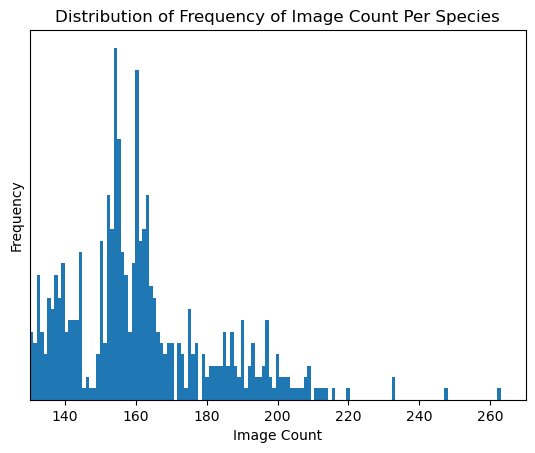

In [14]:
plt.figure()
plt.hist(img_counts, bins = 134)
plt.title('Distribution of Frequency of Image Count Per Species')

plt.xlabel('Image Count')
plt.xlim(130,270)

plt.yticks([])
plt.ylabel('Frequency')
plt.show()

This histogram shows that the vast majority of species have fewer than 200 images and there are many species with 150-170 images.  

Now let's take a look at some photos for the species with the least number of photos. We learned above that the least number of photos is 130, and the following species are tied for least number of photos. 

In [15]:
# find out the species that have 130 images
least_img_species = img_counts[img_counts == 130].index.tolist()

least_img_species

['AMETHYST WOODSTAR',
 'NORTHERN RED BISHOP',
 'SNOWY PLOVER',
 'PATAGONIAN SIERRA FINCH',
 'EURASIAN GOLDEN ORIOLE',
 'RED TAILED THRUSH']

In [16]:
# create a new df of all the rows belowing to species with the least image count
df_least = df_train[df_train["species"].isin(least_img_species)]

df_least

,path,species
3854,train/AMETHYST WOODSTAR/006.jpg,AMETHYST WOODSTAR
3855,train/AMETHYST WOODSTAR/011.jpg,AMETHYST WOODSTAR
3856,train/AMETHYST WOODSTAR/001.jpg,AMETHYST WOODSTAR
3857,train/AMETHYST WOODSTAR/038.jpg,AMETHYST WOODSTAR
3858,train/AMETHYST WOODSTAR/007.jpg,AMETHYST WOODSTAR
...,...,...
71355,train/SNOWY PLOVER/125.jpg,SNOWY PLOVER
71356,train/SNOWY PLOVER/124.jpg,SNOWY PLOVER
71357,train/SNOWY PLOVER/120.jpg,SNOWY PLOVER
71358,train/SNOWY PLOVER/114.jpg,SNOWY PLOVER


In [17]:
# make a new dataframe with 3 randomly selected samples from df_least
samples = df_least.groupby('species').sample(n=3)
samples

,path,species
3875,train/AMETHYST WOODSTAR/018.jpg,AMETHYST WOODSTAR
3905,train/AMETHYST WOODSTAR/050.jpg,AMETHYST WOODSTAR
3859,train/AMETHYST WOODSTAR/004.jpg,AMETHYST WOODSTAR
33521,train/EURASIAN GOLDEN ORIOLE/022.jpg,EURASIAN GOLDEN ORIOLE
33538,train/EURASIAN GOLDEN ORIOLE/009.jpg,EURASIAN GOLDEN ORIOLE
33631,train/EURASIAN GOLDEN ORIOLE/109.jpg,EURASIAN GOLDEN ORIOLE
56699,train/NORTHERN RED BISHOP/006.jpg,NORTHERN RED BISHOP
56778,train/NORTHERN RED BISHOP/071.jpg,NORTHERN RED BISHOP
56744,train/NORTHERN RED BISHOP/079.jpg,NORTHERN RED BISHOP
59817,train/PATAGONIAN SIERRA FINCH/067.jpg,PATAGONIAN SIERRA FINCH


In [21]:
# show all images in the samples dataframe
for index, row in samples.iterrows():
    display(Image(url=row.path))

In [30]:
import cv2

# Load the image
image_path = 'train/AMETHYST WOODSTAR/018.jpg'
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is not None:
    print("Image loaded successfully")
    # Image is already a NumPy array
    print(type(image))
    print("Shape:", image.shape)  # (Height, Width, Channels)

    # Accessing a pixel value
    pixel_value = image[20, 10]
    print("Pixel value (BGR):", pixel_value)
else:
    print("Failed to load the image")

Image loaded successfully
<class 'numpy.ndarray'>
Shape: (224, 224, 3)
Pixel value (BGR): [ 95 165 172]


In [35]:
image

array([[[ 95, 165, 172],
        [ 95, 165, 172],
        [ 95, 165, 172],
        ...,
        [143, 189, 200],
        [143, 189, 200],
        [143, 189, 200]],

       [[ 95, 165, 172],
        [ 95, 165, 172],
        [ 95, 165, 172],
        ...,
        [143, 189, 200],
        [143, 189, 200],
        [143, 189, 200]],

       [[ 95, 165, 172],
        [ 95, 165, 172],
        [ 95, 165, 172],
        ...,
        [143, 189, 200],
        [143, 189, 200],
        [143, 189, 200]],

       ...,

       [[ 94, 137, 140],
        [ 94, 137, 140],
        [ 94, 137, 140],
        ...,
        [126, 165, 174],
        [126, 165, 174],
        [126, 165, 174]],

       [[ 93, 136, 139],
        [ 93, 136, 139],
        [ 93, 136, 139],
        ...,
        [125, 164, 173],
        [126, 165, 174],
        [125, 164, 173]],

       [[ 92, 135, 138],
        [ 92, 135, 138],
        [ 93, 136, 139],
        ...,
        [125, 164, 173],
        [125, 164, 173],
        [125, 164, 173]]

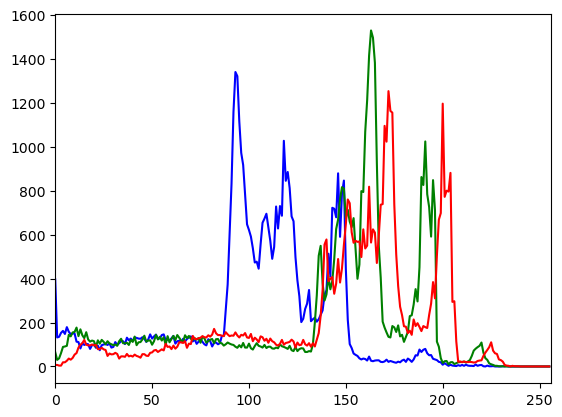

In [37]:
# Convert the given BGR pixel value to RGB
# pixel_rgb = [175, 168, 96]  # Rearranging the BGR to RGB

# # Channel names
# channels = ['Red', 'Green', 'Blue']

for i, col in enumerate(['b', 'g', 'r']):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color = col)
    plt.xlim([0, 256])
    
plt.show()

In [ ]:
# display(Image(url='train/'{species}'001.jpg'))

In [ ]:
the vast majority of species have fewer than 200 images